# Decision Tree

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('../Data/penguins_size.csv')

In [48]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We need to be able to predict penguins belonging to these 3 classes

In [49]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [50]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [52]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [53]:
 df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [54]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [55]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [56]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


We can either drop this row or we could assign an appropriate value

In [57]:
df[df['species'] == 'Gentoo'].groupby('sex').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
.,44.500000,15.700000,217.000000,4875.000000
FEMALE,45.563793,14.237931,212.706897,4679.741379
MALE,49.473770,15.718033,221.540984,5484.836066


It looks like its features are close to the sex: FEMALE

In [58]:
df.at[336, 'sex'] = 'FEMALE'

In [59]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

There is pretty good separation between the features

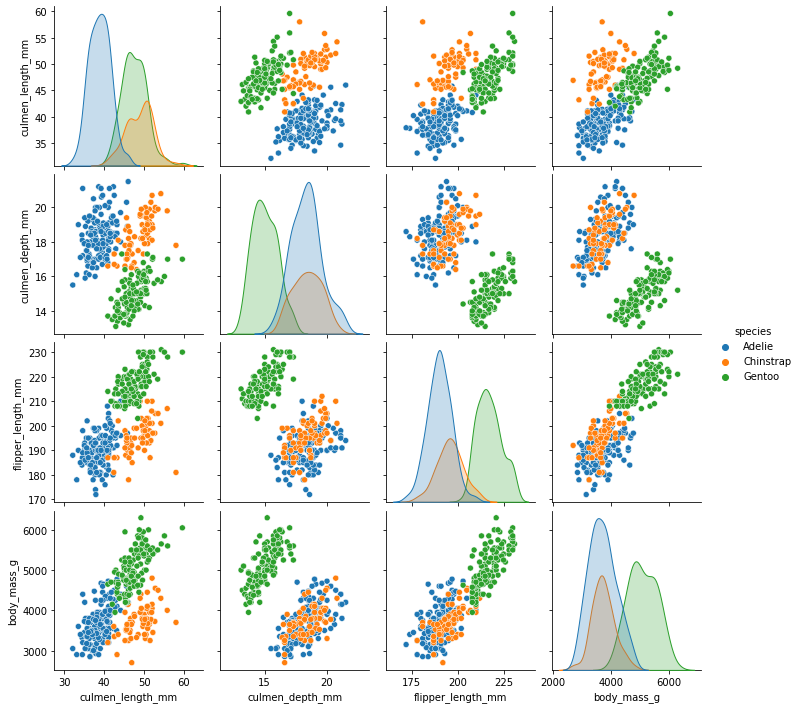

In [60]:
sns.pairplot(df, hue='species')

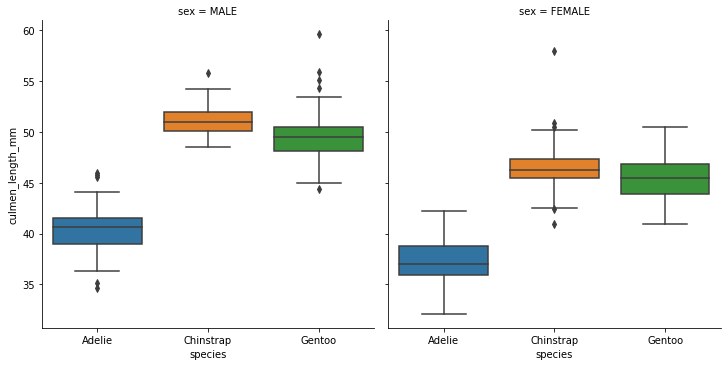

In [61]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex')

In [62]:
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

One-hot encode the categorical columns

In [63]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [64]:
pd.get_dummies(df.drop('species', axis=1), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


### Perform train-test-split

In [65]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [66]:
y = df['species']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model = DecisionTreeClassifier()

In [71]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
base_preds = model.predict(X_test)
base_preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie'

In [73]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [74]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



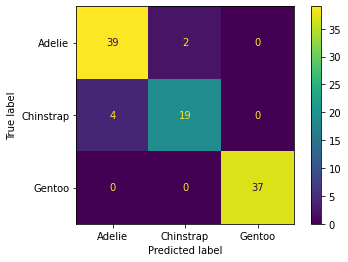

In [76]:
plot_confusion_matrix(model, X_test, y_test)

In [78]:
model.feature_importances_

array([0.32352044, 0.06384241, 0.53120101, 0.01325074, 0.0681854 ,
       0.        , 0.        ])

In [80]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [85]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature importance']).sort_values('Feature importance')

,Feature importance
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.013251
culmen_depth_mm,0.063842
island_Dream,0.068185
culmen_length_mm,0.323520
flipper_length_mm,0.531201


In [86]:
from sklearn.tree import  plot_tree

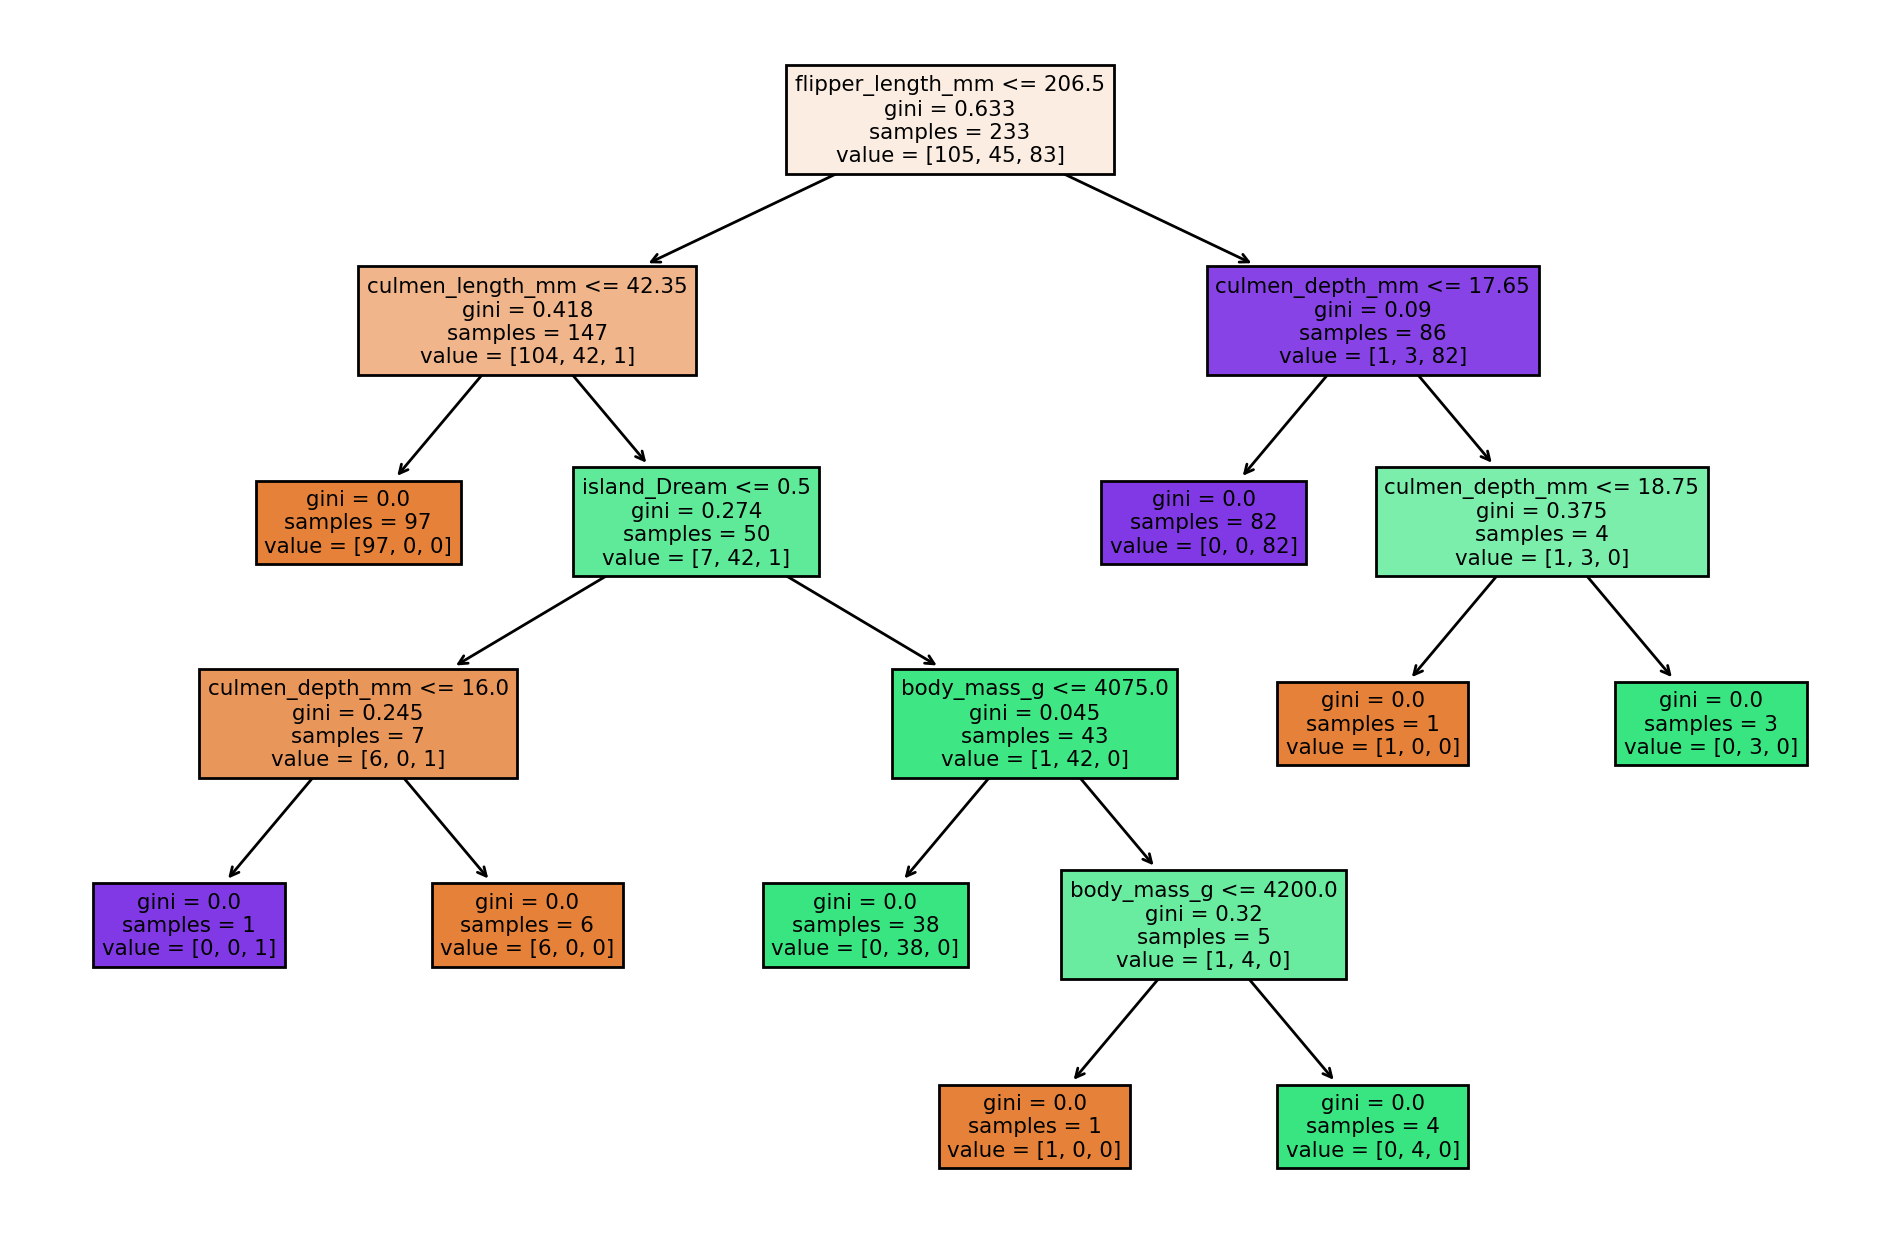

In [91]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

In [94]:
# Sample => The number of data points entering that node
len(X_train)

233

In [95]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101





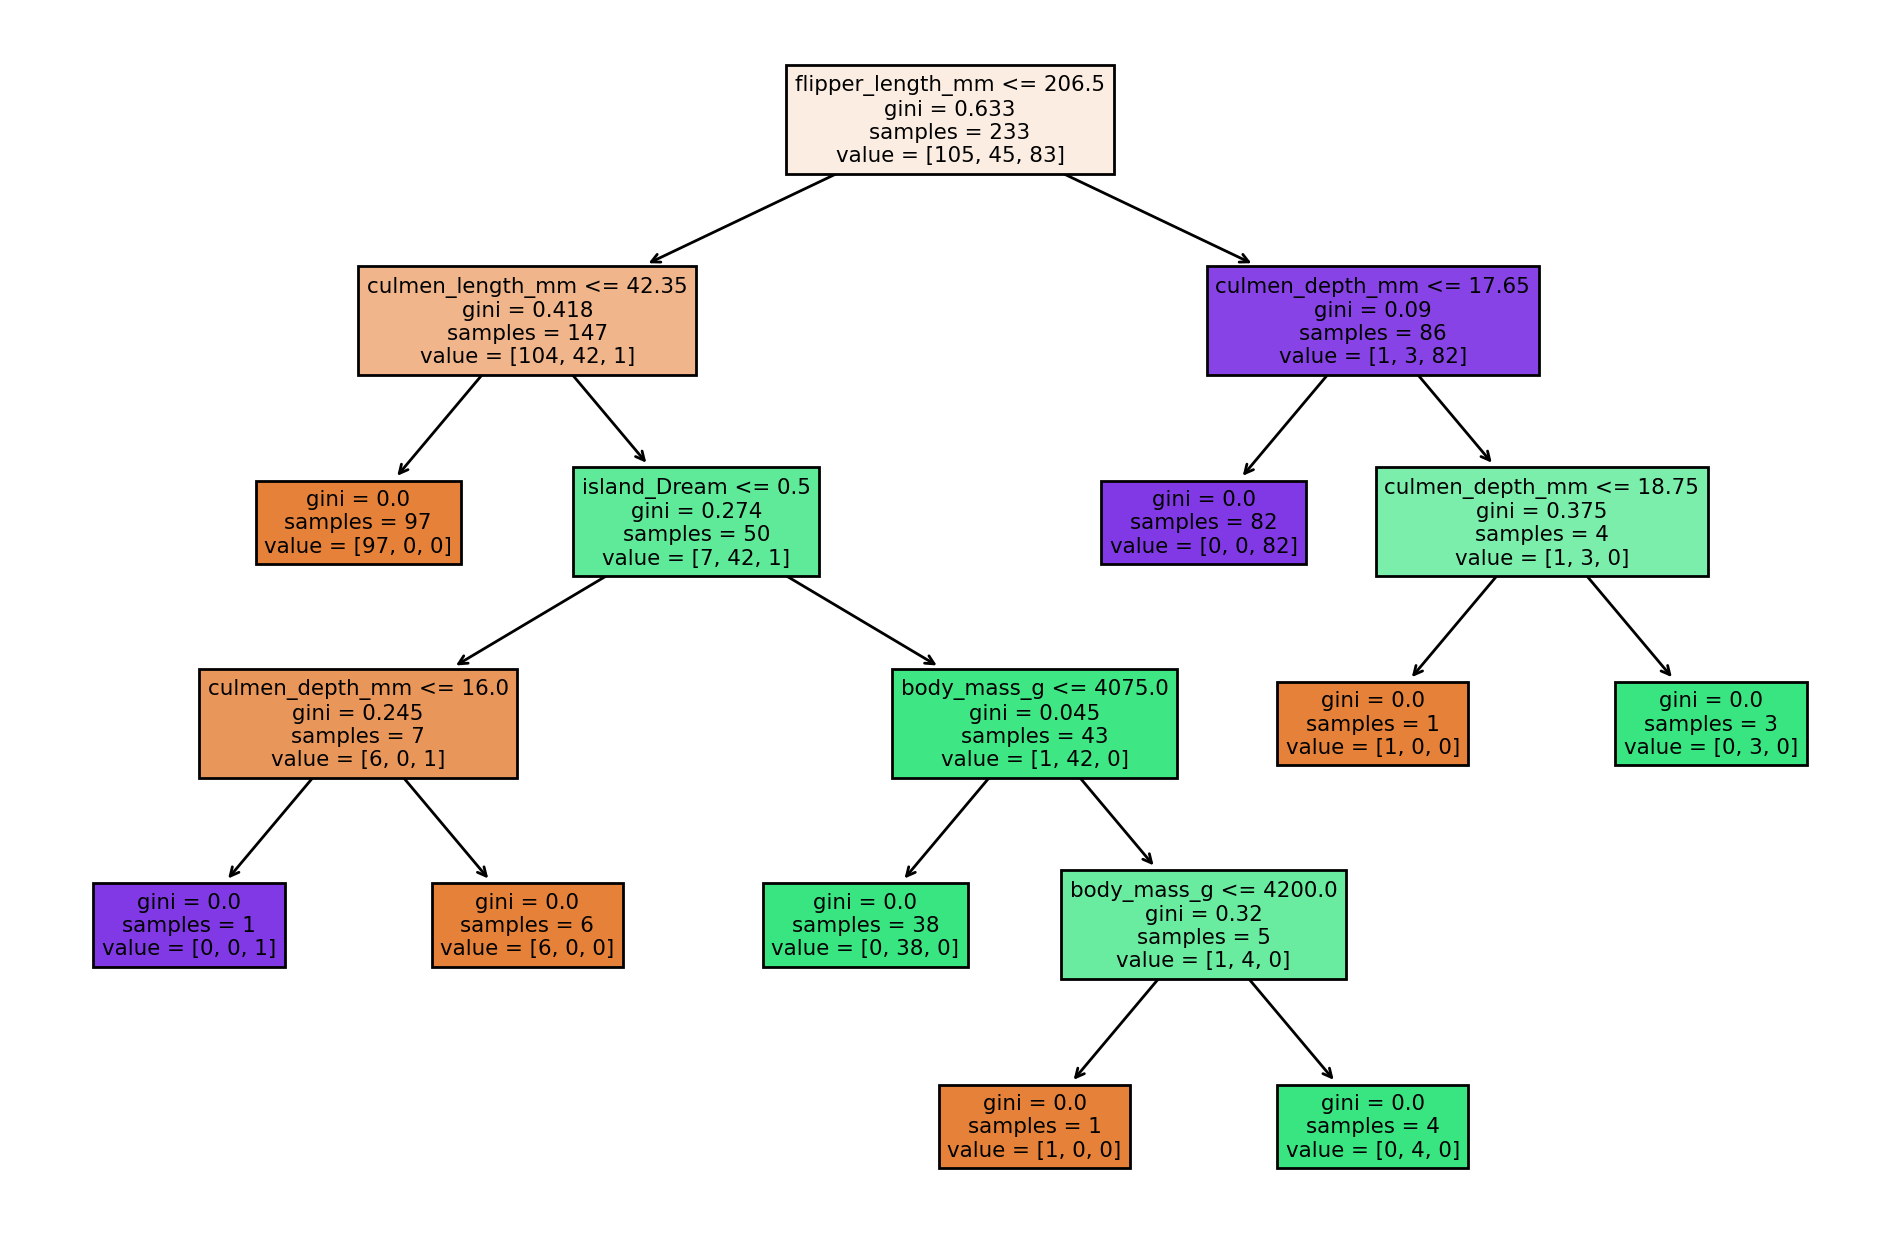

In [96]:
report_model(model)

## Using entropy as an error metric

In [100]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [102]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101





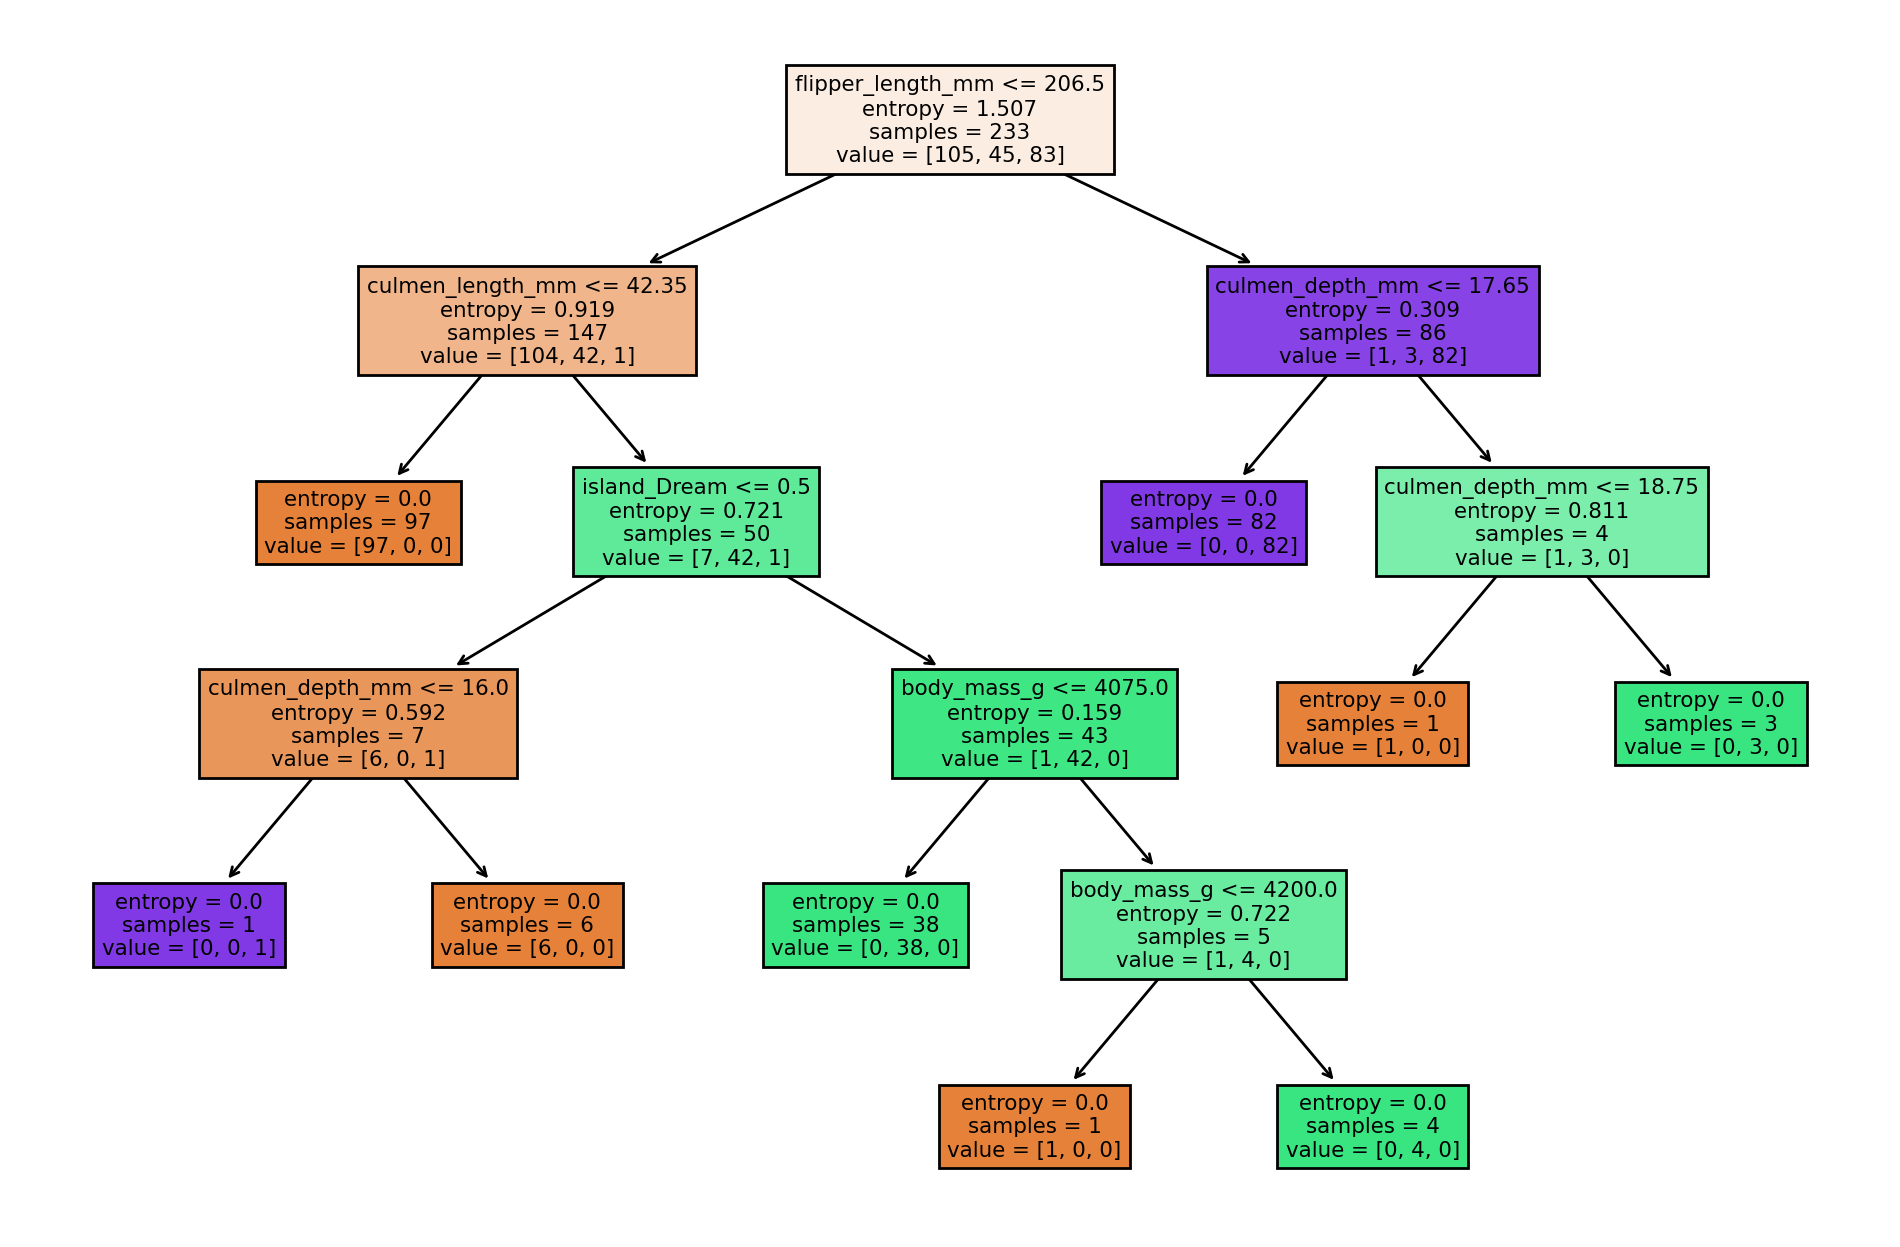

In [103]:
report_model(entropy_tree)

In [107]:
height_3_tree = DecisionTreeClassifier(max_depth=2)

In [108]:
height_3_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





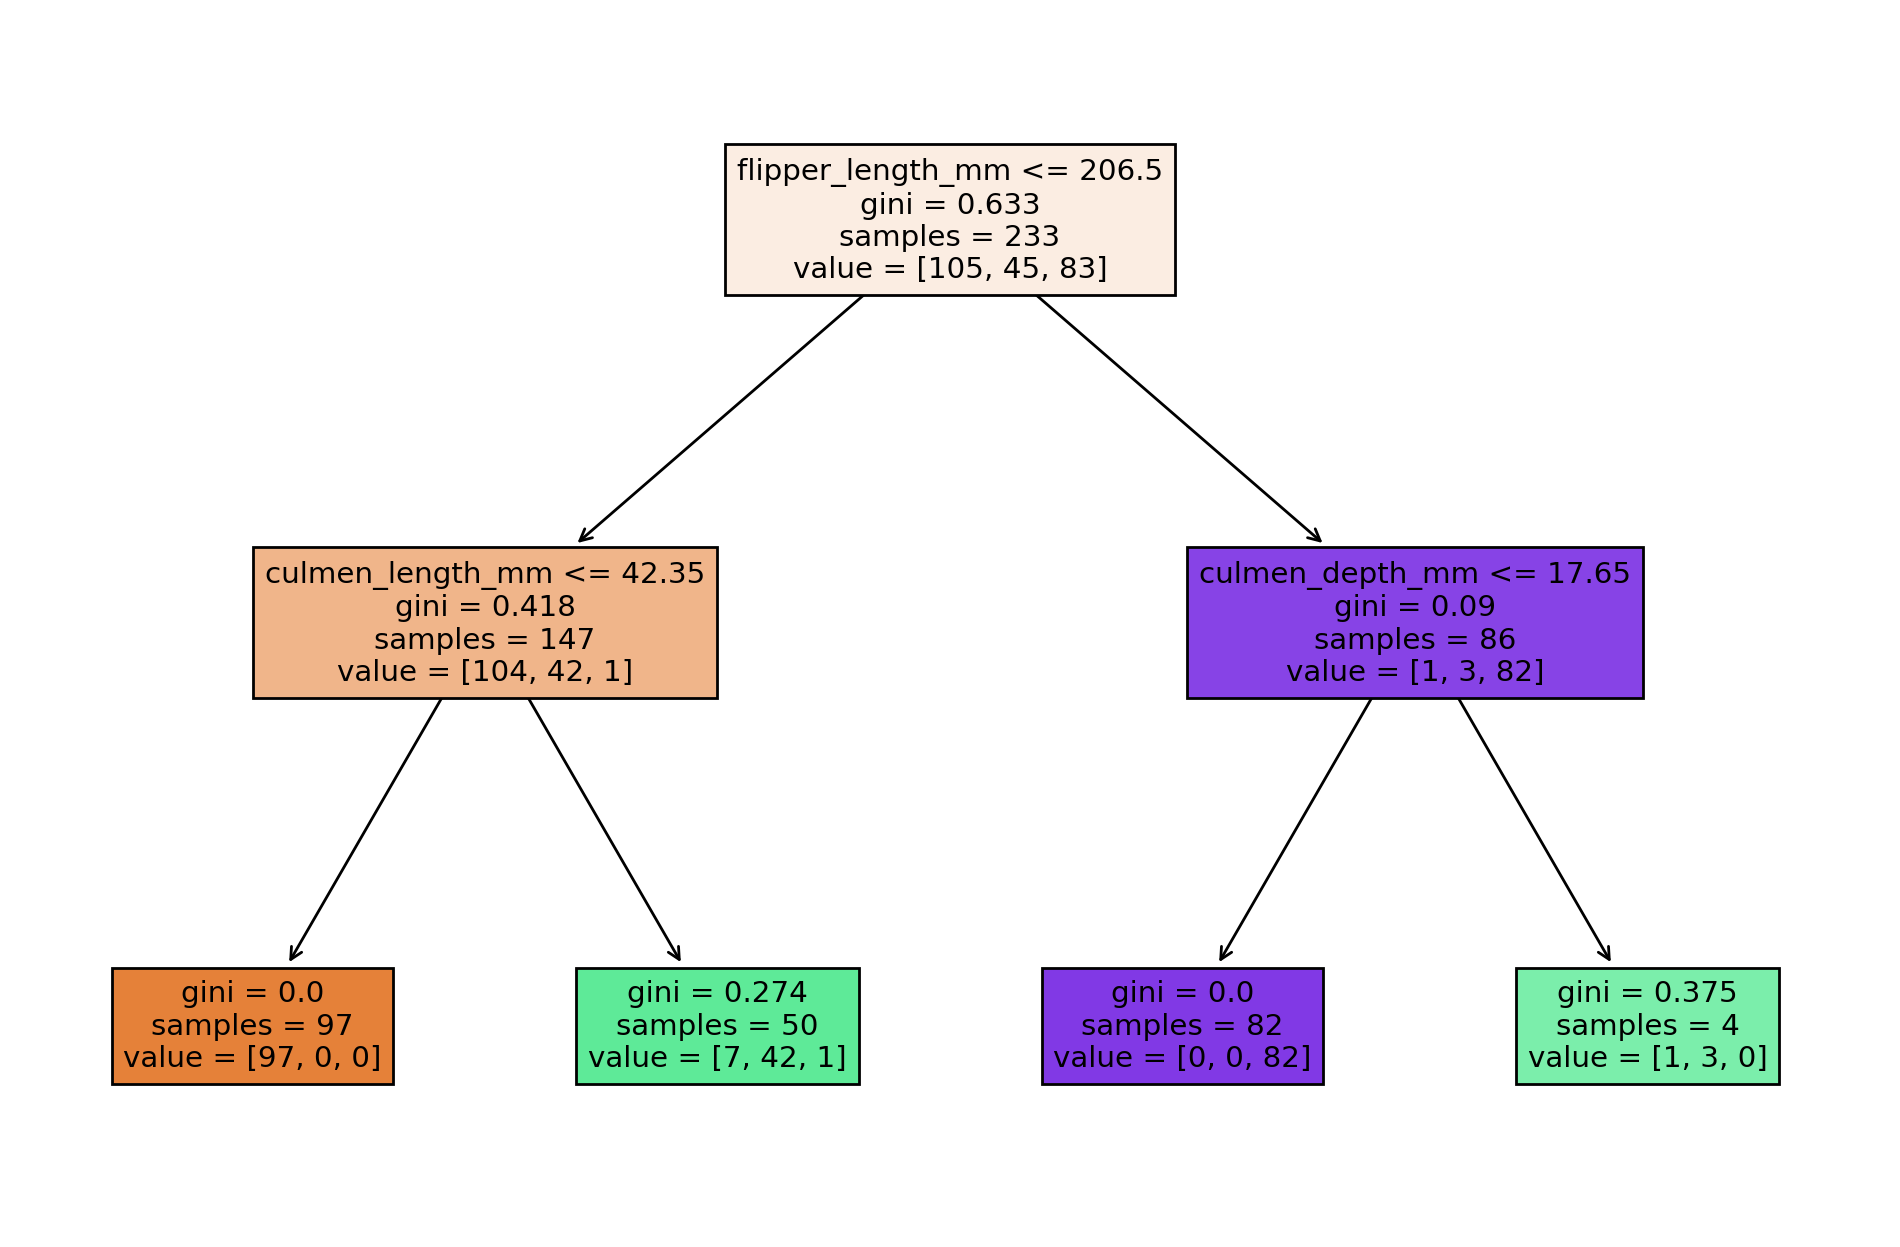

In [109]:
report_model(height_3_tree)